In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier removal using z-score

### This technique apply when data are normally distributed

In [2]:
df = pd.read_csv("dataset/placement.csv")

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

In [4]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
187,6.63,10.0,1
150,8.53,22.0,0
261,7.17,11.0,1
361,6.37,37.0,1
161,6.26,52.0,1


In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [7]:
df.cgpa.describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [8]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

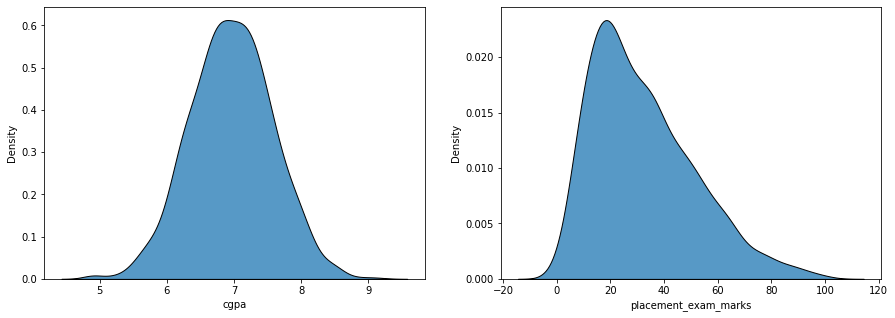

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(x="cgpa", data=df, multiple="stack")

plt.subplot(1, 2, 2)
sns.kdeplot(x="placement_exam_marks", data=df, multiple="stack")

plt.show()

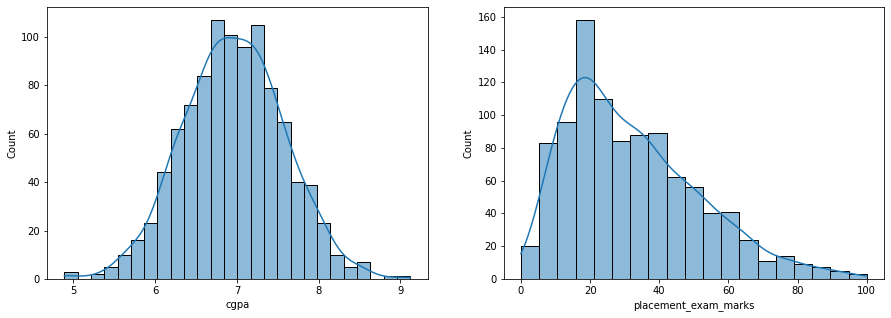

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x="cgpa", data=df, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(x="placement_exam_marks", data=df, kde=True)

plt.show()

In [11]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


### Finding the boundary values

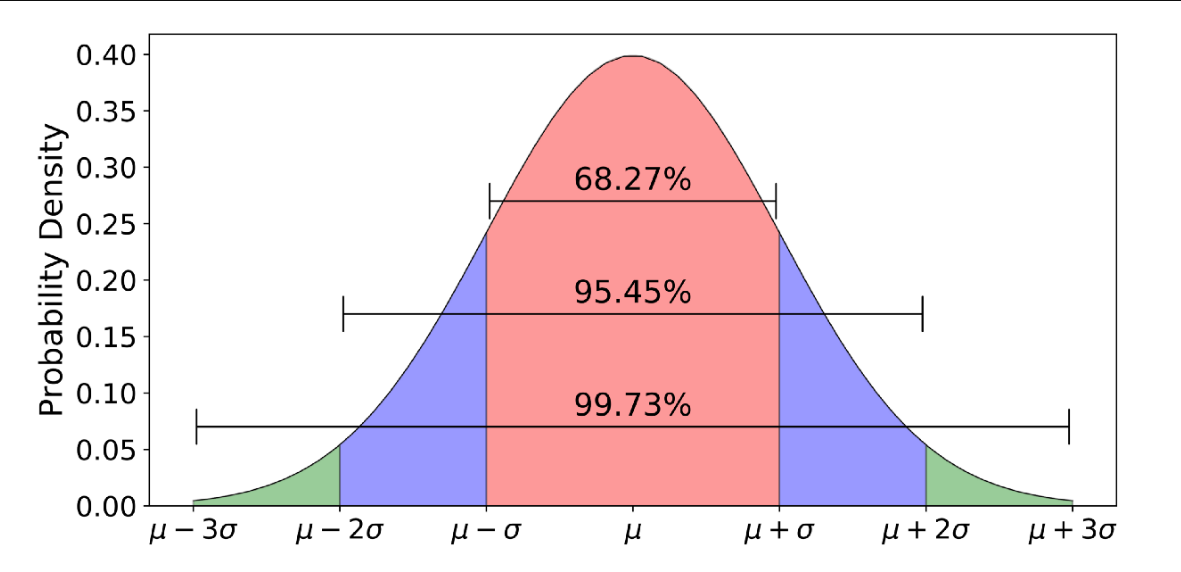

In [12]:
higest_allowed = df['cgpa'].mean() + 3*df['cgpa'].std()

lowest_allowed = df['cgpa'].mean() - 3*df['cgpa'].std()

print("Highest allowed", higest_allowed)

print("Lowest allowed", lowest_allowed)

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [13]:
# Let's find the outlier

df[(df['cgpa'] < lowest_allowed) | (df['cgpa'] > higest_allowed)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### We can do some operation with outlier. this is two technique:
    
    1) Trimming
    
    2) Capping

## Trimming

In [14]:
# Trimming: we remove those outliers

new_df = df[(df['cgpa'] > lowest_allowed) & (df['cgpa'] < higest_allowed)]

new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [15]:
new_df.shape

(995, 3)

## Approach:2 calculating the z-score

In [16]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std() # this is formula

In [17]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [18]:
# those vlaue "cgpa_zscore" > 3 that outlier

df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [19]:
# those vlaue "cgpa_zscore" < -3 that outlier

df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# Trimming 

new_df2 = df[(df['cgpa_zscore'] > -3) & (df['cgpa_zscore'] < 3)]

In [22]:
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [23]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()

lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [24]:
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [25]:
# In capping if we find any value that is gather than upper limit then
# we will replace it by upper limit vlaue. In the same way if we find any value
# that is smaller than lower limit then we will replace it by lower limit value

df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, # Condition
    upper_limit, # execute if condition is true
    np.where(    # execute if condition is false
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [26]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [27]:
df.shape

(1000, 4)

In [28]:
df.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# Outlier removal using inter-quartaile-range method

### this technique apply when our data distribution is skewed

In [29]:
data = pd.read_csv("dataset/placement.csv")

data.sample(5)

,cgpa,placement_exam_marks,placed
532,6.90,20.0,0
517,6.37,38.0,1
333,6.74,20.0,1
618,6.70,22.0,0
924,6.85,23.0,1


In [30]:
data.shape

(1000, 3)

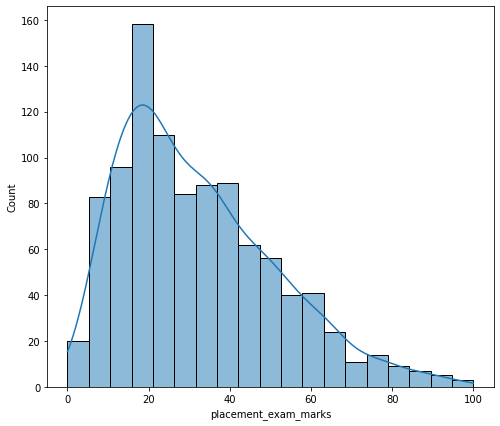

In [31]:
plt.figure(figsize=(8, 7))
sns.histplot(x="placement_exam_marks", data=data, kde=True)
plt.show()

In [32]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [33]:
# Positive skewed means skewed will be right side

data['placement_exam_marks'].skew()

0.8356419499466834

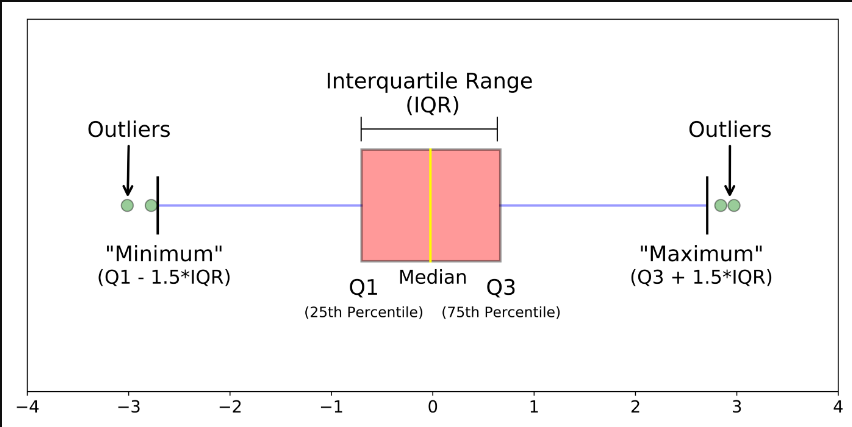

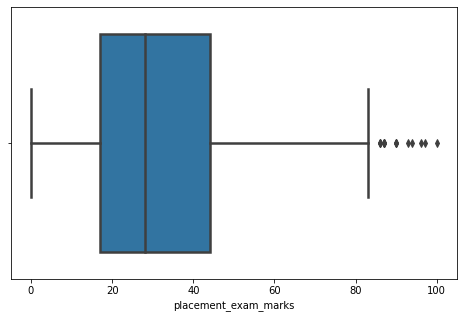

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="placement_exam_marks", data=data, linewidth=2.5)
plt.show()

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


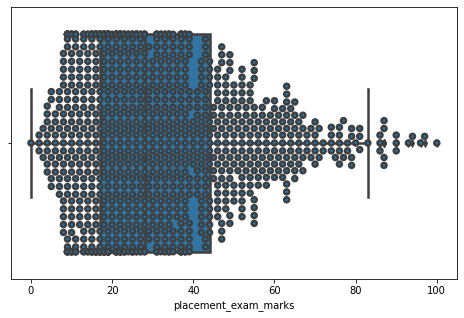

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="placement_exam_marks", data=data, linewidth=2.5)
sns.swarmplot(x="placement_exam_marks", data=data, linewidth=2.5)
plt.show()

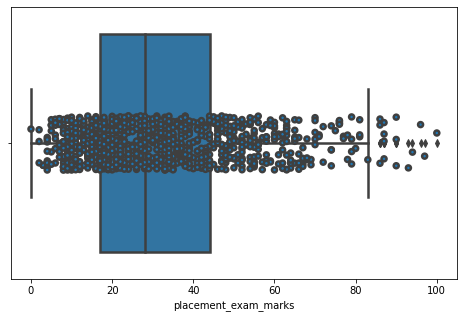

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="placement_exam_marks", data=data, linewidth=2.5)
sns.stripplot(x="placement_exam_marks", data=data, linewidth=2.5)
plt.show()

### Finding the IQR

https://articles.outlier.org/calculate-outlier-formula

In [37]:
Q1 = data['placement_exam_marks'].quantile(0.25)

Q3 = data['placement_exam_marks'].quantile(0.75)

In [38]:
Q3

44.0

In [39]:
Q1

17.0

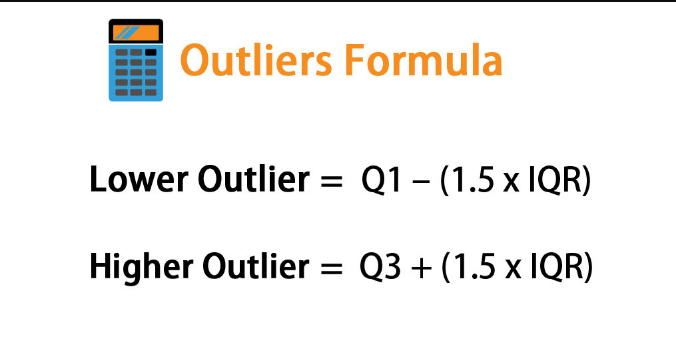

In [40]:
IQR = Q3 - Q1

IQR

27.0

In [41]:
upper_limit = Q3 + (1.5 * IQR)

lower_limit = Q1 - (1.5 * IQR) 

In [42]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding the outliers

In [43]:
data[data['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [44]:
data[data['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [45]:
new_df3 = data[(data['placement_exam_marks'] > lower_limit) & (data['placement_exam_marks'] < upper_limit)]

new_df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [46]:
new_df3.shape

(985, 3)

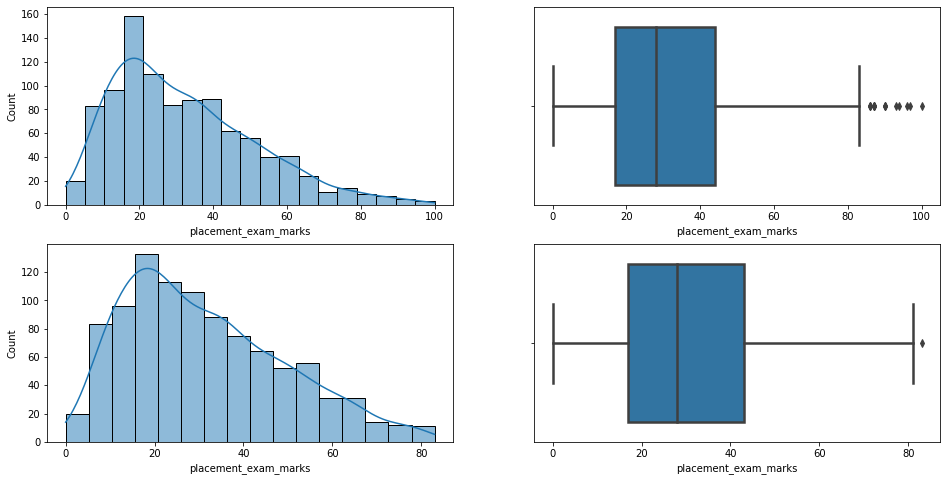

In [47]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
sns.histplot(x='placement_exam_marks', data=data, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x="placement_exam_marks", data=data, linewidth=2.5)

plt.subplot(2 ,2, 3)
sns.histplot(x='placement_exam_marks', data=new_df3, kde=True)

plt.subplot(2 ,2, 4)
sns.boxplot(x="placement_exam_marks", data=new_df3, linewidth=2.5)

plt.show()

### Capping

In [48]:
data2 = data.copy()

In [49]:
data2["placement_exam_marks"] = np.where(
    data2['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        data2['placement_exam_marks'] < lower_limit,
        lower_limit,
        data2['placement_exam_marks']
    )
)

In [50]:
data2.shape

(1000, 3)

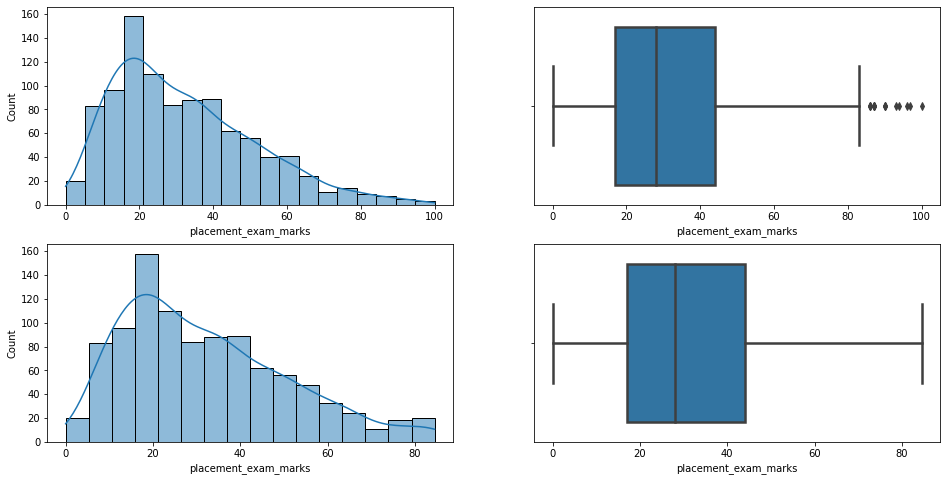

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
sns.histplot(x='placement_exam_marks', data=data, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x="placement_exam_marks", data=data, linewidth=2.5)

plt.subplot(2 ,2, 3)
sns.histplot(x='placement_exam_marks', data=data2, kde=True)

plt.subplot(2 ,2, 4)
sns.boxplot(x="placement_exam_marks", data=data2, linewidth=2.5)

plt.show()

# Outlier removal using percentiles technique

### If data distribution is not normal and skewd then apply this technique

In [52]:
data3 = pd.read_csv("dataset/weight-height.csv")

data3.sample(5)

,Gender,Height,Weight
769,Male,65.747298,182.051690
9639,Female,62.771847,141.808838
5828,Female,61.560609,116.626798
6574,Female,64.755366,146.115654
1934,Male,71.358211,195.937073


In [53]:
data3.shape

(10000, 3)

In [54]:
data3.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [55]:
data3[["Height", "Weight"]].skew()

Height    0.049369
Weight    0.032955
dtype: float64

In [56]:
data3["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [57]:
data3["Weight"].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

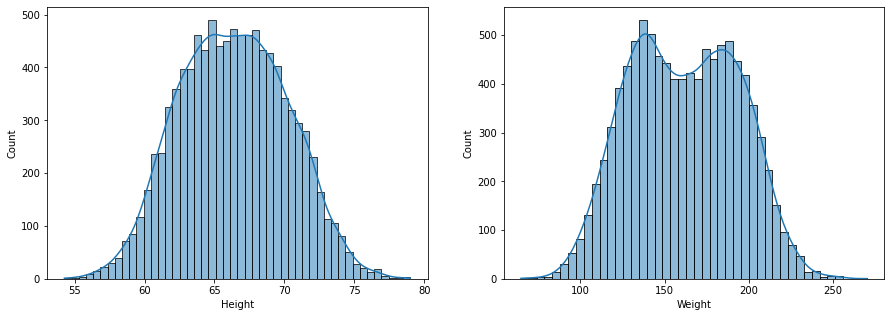

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(x="Height", data=data3, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(x="Weight", data=data3, kde=True)

plt.show()

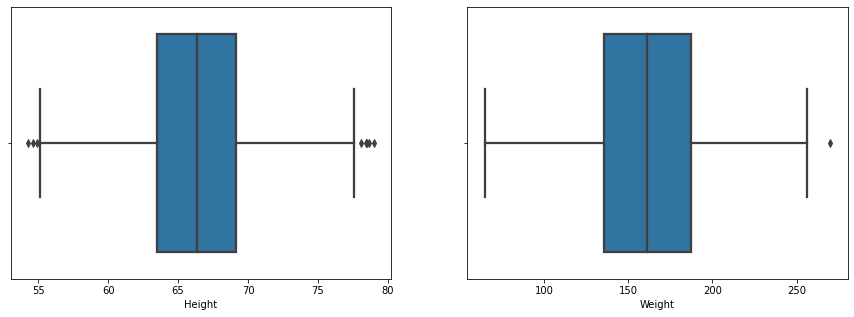

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="Height", data=data3, linewidth=2.25)

plt.subplot(1, 2, 2)
sns.boxplot(x="Weight", data=data3, linewidth=2.25)

plt.show()

In [60]:
# Here there is one oulier in weight column so I have worked on Height column

# In this technique it is my wish to assume the quantile value. But one thing keep in mind
# Upper_limit and lower_limt value should be reduce same way. If I sikp 1% upper limit then 
# I have to also skip 1% in lower limit

upper_limit = data3["Height"].quantile(0.99)

lower_limit = data3['Height'].quantile(0.01)

In [61]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 74.7857900583366
Lower limit 58.13441158671655


### Trimming

In [62]:
new_df4 = data3[(data3['Height'] >= lower_limit) & (data3['Height'] <= upper_limit)]

In [63]:
new_df4['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [64]:
data3['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

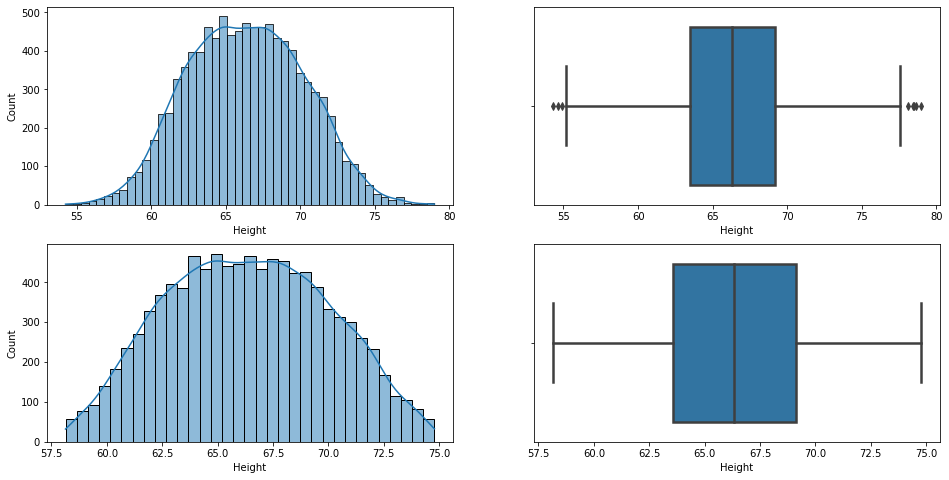

In [65]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
sns.histplot(x='Height', data=data3, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x="Height", data=data3, linewidth=2.5)

plt.subplot(2 ,2, 3)
sns.histplot(x='Height', data=new_df4, kde=True)

plt.subplot(2 ,2, 4)
sns.boxplot(x="Height", data=new_df4, linewidth=2.5)

plt.show()

### Capping

In [66]:
data4 = data3.copy()

In [67]:
# Capping --> Winsorization

data4['Height'] = np.where(
        data4['Height'] >= upper_limit,
        upper_limit,
        np.where(data4['Height'] <= lower_limit,
        lower_limit,
        data4['Height']))

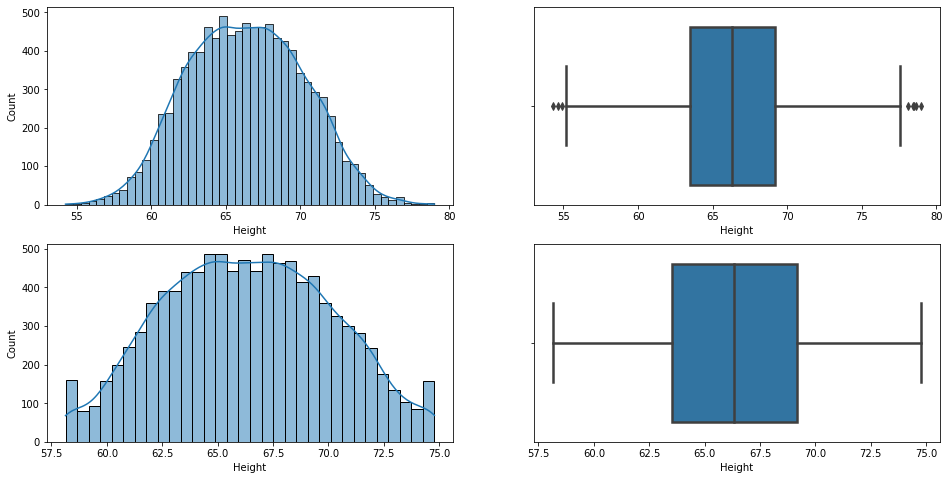

In [68]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
sns.histplot(x='Height', data=data3, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x="Height", data=data3, linewidth=2.5)

plt.subplot(2 ,2, 3)
sns.histplot(x='Height', data=data4, kde=True)

plt.subplot(2 ,2, 4)
sns.boxplot(x="Height", data=data4, linewidth=2.5)

plt.show()